### Time Is Money: The Equilibrium Trading Horizon and Optimal Arrival Price

Kevin Darby

> [CQG, Inc. Denver, USA]

Email address:

kevin@cqg.com

* CQG is the industry's highest-performing solution for integrated trade routing, global market data, and advanced technical analysis tools and algorithms. CQG partners with more than one hundred Futures Commission Merchant environments and provides Direct Market Access to more than forty-five exchanges through its worldwide network of co-located CQG Hosted Exchange Gateways. CQG’s market data feed consolidates data from over seventy-five sources.
* We've been doing this for 43 years.

**Abstract:** Executing even moderately large derivatives orders can be
expensive and risky; it's hard to balance the uncertainty of working an
order over time versus paying a liquidity premium for immediate
execution. Here, we introduce the Time Is Money model, which calculates
the Equilibrium Trading Horizon over which to execute an order within
the <span style="color:yellow">adversarial forces of variance risk and liquidity premium. </span>

* We construct a hypothetical at-the-money option within Arithmetic Brownian
Motion and invert the Bachelier model to compute an inflection point
between implied variance and liquidity cost as governed by a central
limit order book, each in real time as they evolve. As a result, we
demonstrate a novel, continuous-time Arrival Price framework. 

* Further, we argue that traders should be indifferent to choosing between variance
risk and liquidity cost, unless they have a predetermined bias or an
exogenous position with a convex payoff. We, therefore, introduce
half-life factor asymptotics to the model based on a convexity factor
and compare results to existing models. 

* We also describe a specialization of the model for trading a basket of correlated
instruments, as exemplified by a futures calendar spread. 

* Finally, we establish groundwork for microstructure optimizations as well as explore
short term drift and conditional expected slippage within the
Equilibrium Horizon framework.

1\. The Trading Model

Consider the task of liquidating[^1] a position X<sub>0</sub> optimally
over a maximum time horizon T.

To be considered optimal, solution must minimize deviation (or cost)
from a benchmark; for the purposes of this study, the benchmark is
S<sub>0</sub>, the <span style="color:yellow">mid-market price </span> of the asset at the instant we receive the
order to liquidate. <span style="color:yellow">This benchmark is often called Arrival Price.[^2]</span>

However, executing a sufficiently large order at S<sub>0</sub> is often
impossible due to market mechanics and liquidity concerns, so we add an
upper bound to our metric, which we call Sweep To Fill. <span style="color:yellow">Sweep To Fill is
the effective price we would receive by executing the entire liquidation
immediately as a market order</span> <span class="mark">\[10\]</span>.

We construct the trading model under the auspices of Arithmetic Brownian
Motion[^3] <span class="mark">\[3\]</span>, in which the asset price S
evolves via the <span style="color:yellow">stochastic differential equation:</span>

``` math
dS_{t}\  = \ r \cdot S_{t}\ dt\  + \ \sigma dW_{t}
```

Where r is the risk-free interest rate, sigma ($`\sigma`$) is the
annualized volatility in dollar terms and W<sub>t</sub> is the standard
Brownian Motion (or Wiener process).

Given the SDE above, for 0 \<= t \<= T, the terminal value of S is:

``` math
{S{}_{T}}_{} = \ S_{t}e^{r(T - t)} + \  \int_{t}^{T}{}\sigma_s\ \ dW_{s}
```





<span style="color:red">**So what does this mean?**</span>

  * We have two benchmarks for an order, <span style="color:yellow">Arrival Price and Sweep to Fill</span>
  
  * We created a *trading model* for the asset:
  1. Some part of the future value of S is rather deterministic, in the above case, it's a function of expiration time and interest rates
  2. Some part of the future value is stochastic, or randomly determined:
     - In arithmetic brownian motion, the $\sigma$ measure there is essentially an addend that gets multiplied by a random number.
     - In the more famous geometric brownian motion, $\sigma$ is a factor, but for short time periods, due to the order book, arithmetic is a better approximation of dynamics

2\. The Central Limit Order Book (CLOB) and Liquidity Premium

Listed futures contracts are normally advertised to consumers in a
structure resemblant of the figure below. Bid prices and sizes represent
commitments to buy a particular amount of an instrument at a particular
price; conversely, offers confer a commitment to sell. Each price level
is an amalgam of constituent orders in agreement to transact at a single
price.

This structure presents liquidity to the consumer, who either must be
willing to pay a little more or sell for a little less to execute an
aggressive order quickly, or wait in the queue to transact with an
aggressive order that may or may not arrive later. For large orders,
however, this immediate execution *premium* can be appreciable, yet
executing the order over time is wrought with uncertainty.

<span style="color:red">**So the question is, whether and for how long should we work an order?**</span>




An Example of Liquidity Premium:

In the figure below, to liquidate 100 futures, the total cost of
liquidity over S<sub>0</sub> is 44.5 *\[ 18\*(0.125) +
36\*(0.125+0.25) + 46\*(0.125+0.25+0.25) = 44.5,* or 0.445 per lot\], in
dollar terms this is an implicit cost of \$2,225.00, or about 0.01% of
the transaction. This effective immediate fill price (Sweep To Fill) can
also be thought of as ArrivalPrice +/- LiquidityPremium, the cost of
liquidity incurred to execute immediately.

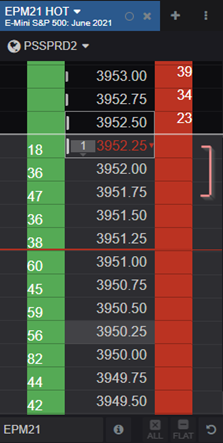

<span class="mark">**Figure 1.** Liquidity in an L2 Order Book.</span>

$LiquidityPremium\  = \ |SweepToFill\  - \ ArrivalPrice$\|

<span style="color:yellow">*Remember: LiquidityPremium is the price you pay to the market maker for getting the order done immediately*</span>

In [1]:
#double check our math

first_three_levels = 18+36+47
print(first_three_levels)

L = 18 * 0.125 + 36 * ( 0.125 + 0.25 ) + 46 * ( 0.125 + 0.25 + 0.25 )
print(f'{L} cost in points')
print(f'{L*50} cost in dollars')


101
44.5 cost in points
2225.0 cost in dollars


3\. Options and the Half-Straddle

<span style="color:yellow">If, rather than paying the liquidity premium to execute immediately, we
choose the path of variance risk, we can quantify that risk</span>, the
expected move[^4] in S over the life of the order:

``` math
Exp\lbrack dS\rbrack\  = \ 2.0\  \cdot \sigma\sqrt{(T - t)}\ /\ \sqrt{2\pi\ }
```

The equation above is also equal to the theoretical value of an
at-the-money straddle with an expiration at time T, the maximum horizon
of our order. This is to say that between T<sub>0</sub> and T, we would
expect S to vary by this amount.

Now, we construct a hypothetical option (a half-straddle, struck at
K=S<sub>0</sub>) within Arithmetic Brownian Motion using the Bachelier
option model \[6\]. This option’s value will be half the expected move
of S during the maximum horizon of our order (above); *it is the cost of
insuring against a move in one direction.*

The price of a Vanilla Call Option[^5] can be expressed as:

``` math
C_{t}\  = \ e^{- r(T - t)}\ ((S_{T} - k) \cdot \Phi(d_{1})\  + \ g)
```

Where

``` math
d_{1}\  = \ (S_{T} - k)\ /\ (\ \sigma\sqrt{(T - t)\ }\ )
```

And

``` math
g\  = \ \varphi(d_{1})\  \cdot \ \sigma\sqrt{(T - t)}\   
``` 
<span class="mark">(eq 1)</span>

Where S<sub>T</sub> is the forward price of the asset, r is the
risk-free rate, k is the strike price, and 𝜱 and 𝝋 are the cumulative
normal and probability density functions, respectively. Ignoring
interest rates (over such a short period of time), we set r = 0, and
S<sub>T</sub> = S<sub>0</sub>.

Then, with a little algebra, we find the value of the half-straddle (ATM
Option with S<sub>T</sub> = k) is:

``` math
H_{t}\  = \ e^{- r(T - t)}\ \varphi(0.0)\  \cdot \ \sigma\sqrt{(T - t)\ }
```

And recognizing

``` math
\varphi(0.0)\  = \ 1/\sqrt{2\pi\ }
```

We’re left with:
```math
H_{t}\  = \ \sigma\ \sqrt{(T - t)\ }\ /\sqrt{2\pi\ }\  = 0.5\ Exp\lbrack dS\rbrack
```
<span class="mark">(eq 2)</span>


<span style="color:lightyellow">*Remember, this is the 'Normal' or 'Bachelier' options model, it works within arithmetic brownian motion, and says that the underlying price is normally distributed.*  </span>

<span style="color:lightyellow"> *This is not the Black-Scholes model which works within geometric brownian motion and says that the underlying log-returns are normally distributed*</span>


4\. The Martingale and the Equilibrium Trading Horizon

Given the dynamics described above, we now equate the (CLOB-based)
liquidity premium to the premium of the hypothetical half-straddle[^6]
struck at Arrival Price (S<sub>0</sub>). This is to say that <span style="color:yellow">the CLOB
structure imbues the trader with *optionality* - a choice of either
taking variance risk in executing the trade over *some amount of time*,
or paying the liquidity *premium* instantaneously to mitigate that risk.</span>

Now, if we know the instantaneous cost of liquidity, and if we can
compute implied sigma from an estimate of spot
volatility[^7]<span class="mark">\[9\]</span> and forward volatility
through a liquid options market[^8]
<span class="mark">\[7\]\[8\]</span>, we can calculate the maximum tenor
of a half-straddle purchasable with an investment of the liquidity
premium-- this “implied time” is exactly equal to the future point in
time at which variance risk equals the cost of liquidity.

Here, we compute the tenor of a half-straddle given a liquidity premium
(L=H) and sigma:

``` math
H_{t}\  = \ L = (SweepToFill - ArrivalPrice) = LiquidityPremium
```

Where H(t) is the half-straddle (or ATM option):

``` math
L\  = \ H_{t}\  = \ \sigma\sqrt{(T - t)\ }\ /\ \sqrt{2\pi\ }
```

Given $`\sigma`$ we can solve for (T-t) and obtain:

```math
T^{*} = (T - t) = \ 2\pi \cdot (H/\sigma)^{2}\ 
```
<span class="mark">(eq 3)</span>



<span style="color:yellow"> *We answered the question -- if we map the dynamics of S to arithmetic brownian motion, and know $\sigma$ and L we can compute an optimal time over which to work an order*</span>

### **So, how do we compute $\sigma$ anyway?**

There are many estimation techniques, but over short time periods, we use two primary estimators

1) Use some combination of Open, High, Low, Close [11] [15]
<https://www.jstor.org/stable/pdf/10.1086/209650.pdf>

2) Use a time series to compute realized variance

In [2]:
import numpy as np
import pandas as pd

import sys
import os
sys.path.append('../../../../build/debug/server/')
sys.path.append('../../../../build/debug/src/lib/api/services/')
sys.path.append('../../../../build/debug/src/')
sys.path.append('../../../../ml/')
print(sys.path)

['/usr/local/lib/python310.zip', '/usr/local/lib/python3.10', '/usr/local/lib/python3.10/lib-dynload', '', '/home/algo/code/cqg/bts/spark/ml/pipeline/.venv/lib/python3.10/site-packages', '../../../../build/debug/server/', '../../../../build/debug/src/lib/api/services/', '../../../../build/debug/src/', '../../../../ml/']


### Technique #1 -- look at OHLC

  * Yang and Zhang 2000 <https://www.jstor.org/stable/10.1086/209650>
  * Garman and Klass 1980 <https://www.jstor.org/stable/2352358>

In [3]:
# Access our C code
from ctypes import *
so_file = "../../../../build/debug/server/libspark-analytics-shared.so"
c_functions = CDLL(so_file)

In [4]:
#9/24 vix open 15.87
#8/8 vix open 28.34

In [5]:
import math

#9/24
open1 = c_double(5774.0)
high1 = c_double(5794.25)
low1 = c_double(5754.75)
close1 = c_double(5792.75)

c_functions.day_vol_estimate_gk.restype = c_double
c_functions.day_vol_estimate.restype = c_double

gkv1 : c_double = c_functions.day_vol_estimate_gk(open1, high1, low1, close1)
yzv1 : c_double = c_functions.day_vol_estimate(open1, high1, low1, close1)
print('v1', f'garman-klass {gkv1*100} %', f'yang-zhang {yzv1*100} %')
print(f'spot check v1 {100*40.0 / 5792} %')
print(f"NOTE this is a daily vol, to make this 'normal vol' *= F { yzv1 * 5774.0 }")
print(f"To annualize this, we multiply by sqrt(252): { math.sqrt(252)* yzv1 * 100.0} % ")

print()

#8/8
open2 = c_double(5262.50)
high2 = c_double(5414.0)
low2 = c_double(5235.50)
close2 = c_double(5407.0)

gkv2 : c_double = c_functions.day_vol_estimate_gk(open2, high2, low2, close2)
yzv2 : c_double = c_functions.day_vol_estimate(open2, high2, low2, close2)
print('v2', f'garman-klass {gkv2*100} %', f'yang-zhang {yzv2*100} %')
print(f'spot check v2 {100*100.0 / 5800} %')
print(f"NOTE this is a daily vol, to make this 'normal vol' *= F { yzv2 * 5262.0 }")
print(f"To annualize this, we multiply by sqrt(252): { math.sqrt(252)* yzv2 * 100.0} % ")



v1 garman-klass 0.43972197109967676 % yang-zhang 0.4783863015672168 %
spot check v1 0.6906077348066298 %
NOTE this is a daily vol, to make this 'normal vol' *= F 27.622025052491097
To annualize this, we multiply by sqrt(252): 7.594147107400826 % 

v2 garman-klass 1.6689497095919061 % yang-zhang 1.4230843278008902 %
spot check v2 1.7241379310344827 %
NOTE this is a daily vol, to make this 'normal vol' *= F 74.88269732888284
To annualize this, we multiply by sqrt(252): 22.59076335620806 % 


### Technique 2 -- Time Series

In [6]:
import pathlib

sparkdata_path = pathlib.Path('/home/algo/code/cqg/bts/spark/ml/pipeline/notebooks/arrival/') #local
from pipeline.methods.lightgbm.read_mbo import read_mbo_file
pd.set_option('display.max_columns', 3000)
pd.set_option("display.max_rows", 50)

In [7]:
mbo_file = [
    'es_20240924T0830-20240924T0900.parquet',
]

full_path = [str(sparkdata_path) + "/" + file for file in mbo_file]
security_desc = "ESZ4"

def filter_function(df):
    return df[df['security'].isin([security_desc])]

our_timestamp = 'transact_time'
price_target = "mid_0"
es_9_24 = read_mbo_file(full_path,
                           our_timestamp=our_timestamp,
                           price_target=price_target,
                           resample=None,
                           filter=filter_function,
)

/home/algo/code/cqg/bts/spark/ml/pipeline/notebooks/arrival/es_20240924T0830-20240924T0900.parquet


/home/algo/code/cqg/bts/spark/ml/pipeline/notebooks/arrival/../../../../ml/pipeline/methods/lightgbm/read_mbo.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, price_target] = 0.5 * (data[bm] + data[am])


In [8]:

es_9_24.iloc[-20:-14]

index  version            timestamp  sending_time  \
588019  646560        3  1727186399908694000             0   
588020  646561        3  1727186399908694000             0   
588021  646562        3  1727186399908694000             0   
588022  646563        3  1727186399908757000             0   
588023  646564        3  1727186399908757000             0   
588024  646565        3  1727186399908806000             0   

                       transact_time  security_id security  trade_count  \
588019 2024-09-24 13:59:59.908190355       183748     ESZ4          1.0   
588020 2024-09-24 13:59:59.908199779       183748     ESZ4          1.0   
588021 2024-09-24 13:59:59.908204273       183748     ESZ4          1.0   
588022 2024-09-24 13:59:59.908208305       183748     ESZ4          1.0   
588023 2024-09-24 13:59:59.908212317       183748     ESZ4          1.0   
588024 2024-09-24 13:59:59.908474173       183748     ESZ4          NaN   

        avg_trade_price  min_trade_price  max_trade_price  sum_trade_size  \
588019           5772.5           5772.5           5772.5             1.0   
588020           5772.5           5772.5           5772.5             1.0   
588021           5772.5           5772.5           5772.5             1.0   
588022           5772.5           5772.5           5772.5             1.0   
588023           5772.5           5772.5           5772.5             1.0   
588024              NaN              NaN              NaN             NaN   

        sum_trade_number_of_orders  last_trade_price  last_trade_size  \
588019                         2.0            5772.5              1.0   
588020                         2.0            5772.5              1.0   
588021                         2.0            5772.5              1.0   
588022                         2.0            5772.5              1.0   
588023                         2.0            5772.5              1.0   
588024                         NaN               0.0              0.0   

        last_trade_number_of_orders  last_trade_agg_side  bid_price_0  \
588019                          0.0                  1.0      5772.25   
588020                          0.0                  1.0      5772.25   
588021                          0.0                  1.0      5772.25   
588022                          0.0                  1.0      5772.25   
588023                          0.0                  1.0      5772.25   
588024                          0.0                  0.0      5772.25   

        bid_size_0  bid_price_1  bid_size_1  bid_price_2  bid_size_2  \
588019         5.0       5772.0        32.0      5771.75        36.0   
588020         5.0       5772.0        32.0      5771.75        36.0   
588021         5.0       5772.0        32.0      5771.75        36.0   
588022         5.0       5772.0        32.0      5771.75        36.0   
588023         5.0       5772.0        32.0      5771.75        36.0   
588024         5.0       5772.0        32.0      5771.75        36.0   

        bid_price_3  bid_size_3  bid_price_4  bid_size_4  bid_price_5  \
588019       5771.5        11.0      5771.25       215.0       5771.0   
588020       5771.5        11.0      5771.25       215.0       5771.0   
588021       5771.5        11.0      5771.25       215.0       5771.0   
588022       5771.5        11.0      5771.25       215.0       5771.0   
588023       5771.5        11.0      5771.25       215.0       5771.0   
588024       5771.5        11.0      5771.25       215.0       5771.0   

        bid_size_5  bid_price_6  bid_size_6  bid_price_7  bid_size_7  \
588019        48.0      5770.75        47.0       5770.5        38.0   
588020        48.0      5770.75        47.0       5770.5        38.0   
588021        48.0      5770.75        47.0       5770.5        38.0   
588022        48.0      5770.75        47.0       5770.5        38.0   
588023        48.0      5770.75        47.0       5770.5        38.0   
588024        48.0      5770.75    

In [9]:
df = es_9_24.copy()
len(df)

588039

In [10]:
df['prev_mid'] = df[price_target].shift(1)

In [11]:
def conditions_ret(s):
    d = (s[price_target] - s["prev_mid"])
    if(d == 0.0):
        return math.nan
    return d / s[price_target]

df['mid_ret'] = df.apply(conditions_ret, axis=1)

In [12]:
df.iloc[-20:-14]

index  version            timestamp  sending_time  \
588019  646560        3  1727186399908694000             0   
588020  646561        3  1727186399908694000             0   
588021  646562        3  1727186399908694000             0   
588022  646563        3  1727186399908757000             0   
588023  646564        3  1727186399908757000             0   
588024  646565        3  1727186399908806000             0   

                       transact_time  security_id security  trade_count  \
588019 2024-09-24 13:59:59.908190355       183748     ESZ4          1.0   
588020 2024-09-24 13:59:59.908199779       183748     ESZ4          1.0   
588021 2024-09-24 13:59:59.908204273       183748     ESZ4          1.0   
588022 2024-09-24 13:59:59.908208305       183748     ESZ4          1.0   
588023 2024-09-24 13:59:59.908212317       183748     ESZ4          1.0   
588024 2024-09-24 13:59:59.908474173       183748     ESZ4          NaN   

        avg_trade_price  min_trade_price  max_trade_price  sum_trade_size  \
588019           5772.5           5772.5           5772.5             1.0   
588020           5772.5           5772.5           5772.5             1.0   
588021           5772.5           5772.5           5772.5             1.0   
588022           5772.5           5772.5           5772.5             1.0   
588023           5772.5           5772.5           5772.5             1.0   
588024              NaN              NaN              NaN             NaN   

        sum_trade_number_of_orders  last_trade_price  last_trade_size  \
588019                         2.0            5772.5              1.0   
588020                         2.0            5772.5              1.0   
588021                         2.0            5772.5              1.0   
588022                         2.0            5772.5              1.0   
588023                         2.0            5772.5              1.0   
588024                         NaN               0.0              0.0   

        last_trade_number_of_orders  last_trade_agg_side  bid_price_0  \
588019                          0.0                  1.0      5772.25   
588020                          0.0                  1.0      5772.25   
588021                          0.0                  1.0      5772.25   
588022                          0.0                  1.0      5772.25   
588023                          0.0                  1.0      5772.25   
588024                          0.0                  0.0      5772.25   

        bid_size_0  bid_price_1  bid_size_1  bid_price_2  bid_size_2  \
588019         5.0       5772.0        32.0      5771.75        36.0   
588020         5.0       5772.0        32.0      5771.75        36.0   
588021         5.0       5772.0        32.0      5771.75        36.0   
588022         5.0       5772.0        32.0      5771.75        36.0   
588023         5.0       5772.0        32.0      5771.75        36.0   
588024         5.0       5772.0        32.0      5771.75        36.0   

        bid_price_3  bid_size_3  bid_price_4  bid_size_4  bid_price_5  \
588019       5771.5        11.0      5771.25       215.0       5771.0   
588020       5771.5        11.0      5771.25       215.0       5771.0   
588021       5771.5        11.0      5771.25       215.0       5771.0   
588022       5771.5        11.0      5771.25       215.0       5771.0   
588023       5771.5        11.0      5771.25       215.0       5771.0   
588024       5771.5        11.0      5771.25       215.0       5771.0   

        bid_size_5  bid_price_6  bid_size_6  bid_price_7  bid_size_7  \
588019        48.0      5770.75        47.0       5770.5        38.0   
588020        48.0      5770.75        47.0       5770.5        38.0   
588021        48.0      5770.75        47.0       5770.5        38.0   
588022        48.0      5770.75        47.0       5770.5        38.0   
588023        48.0      5770.75        47.0       5770.5        38.0   
588024        48.0      5770.75    

In [13]:
from termcolor import colored
print(df[price_target].mean() )
price_var = df[price_target].var()

print("Price Var So Far: ", price_var )
print(colored(f"Price NVol So Far: {math.sqrt(price_var)}", 'yellow') )


5777.81618438573
Price Var So Far:  5.9348967688173095
Price NVol So Far: 2.436164355871194


In [14]:
c_functions.create_running_stats.restype = POINTER(c_void_p)
c_functions.running_stats_mean.restype = c_double
c_functions.running_stats_var.restype = c_double
c_functions.running_stats_m0var.restype = c_double

rstats = c_functions.create_running_stats()
for i, r in df.iterrows():
    #val = r[price_target]
    val = r["mid_ret"]
    if math.isnan(val):
        continue
    c_functions.running_stats_push(rstats, c_double(val))


* Realized Variance - <https://en.wikipedia.org/wiki/Realized_variance> 

In [15]:
ret0 = c_functions.running_stats_m0var(rstats)
print(colored(f"Sum of Squared Returns NVol {math.sqrt(ret0) *  df.iloc[len(df)-1][price_target]}", 'yellow'))

Sum of Squared Returns NVol 26.216134427643908


In [16]:
duration = df.iloc[len(df)-1][our_timestamp] - df.iloc[10][our_timestamp] #10 here because the first few ts are null
duration

Timedelta('0 days 00:29:59.278846710')

In [17]:
seconds_per_day = 86_400
minutes_per_day = 1440

In [18]:
#variance is additive, so we can attempt to linearize this variance into a daily variance
tfact = seconds_per_day / duration.total_seconds()
tfact

48.019238481059766

In [19]:
normal_vol_from_price_var = math.sqrt(price_var*tfact)
print(colored(f"NVol estimate from Price Var * tfact {normal_vol_from_price_var}", 'yellow'))
#NOTE likely understated because of many market updates with no price change ( var is divided by N)

NVol estimate from Price Var * tfact 16.881623834877658


In [20]:
normal_vol_yz_for_day = yzv1 * df.iloc[len(df)-1][price_target]
print(colored(f"NVol estimate from OHLC {normal_vol_yz_for_day}", 'yellow'))

NVol estimate from OHLC 27.614849257967588


In [21]:
#https://en.wikipedia.org/wiki/Realized_variance
normal_vol_right_now = math.sqrt(ret0) *  df.iloc[len(df)-1][price_target]
print(colored(f"We'll take the sum of squared returns, NVol =  {normal_vol_right_now}", 'light_red'))

We'll take the sum of squared returns, NVol =  26.216134427643908


### **Ok, so we have a vol estimate, what about the price of liquidity?**

* For that, we look at the order book
* Let's look at the market in the middle of the parquet file
* We'll look to buy 100

In [22]:
start_row_index = int(len(df) / 2)
start_row = df.iloc[ start_row_index : start_row_index+1 ]
start_row

index  version            timestamp  sending_time  \
294019  318513        3  1727185299754123000             0   

                       transact_time  security_id security  trade_count  \
294019 2024-09-24 13:41:39.753621215       183748     ESZ4          2.0   

        avg_trade_price  min_trade_price  max_trade_price  sum_trade_size  \
294019           1926.0           5778.0           5778.0             6.0   

        sum_trade_number_of_orders  last_trade_price  last_trade_size  \
294019                         7.0            5778.0              2.0   

        last_trade_number_of_orders  last_trade_agg_side  bid_price_0  \
294019                          0.0                  1.0      5777.75   

        bid_size_0  bid_price_1  bid_size_1  bid_price_2  bid_size_2  \
294019        18.0       5777.5        42.0      5777.25        66.0   

        bid_price_3  bid_size_3  bid_price_4  bid_size_4  bid_price_5  \
294019       5777.0        60.0      5776.75        65.0       5776.5   

        bid_size_5  bid_price_6  bid_size_6  bid_price_7  bid_size_7  \
294019        65.0      5776.25        82.0       5776.0       131.0   

        bid_price_8  bid_size_8  bid_price_9  bid_size_9  ask_price_0  \
294019      5775.75       138.0       5775.5        75.0       5778.0   

        ask_size_0  ask_price_1  ask_size_1  ask_price_2  ask_size_2  \
294019        58.0      5778.25        62.0       5778.5        68.0   

        ask_price_3  ask_size_3  ask_price_4  ask_size_4  ask_price_5  \
294019      5778.75        78.0       5779.0        61.0      5779.25   

        ask_size_5  ask_price_6  ask_size_6  ask_price_7  ask_size_7  \
294019       168.0       5779.5       132.0      5779.75        83.0   

        ask_price_8  ask_size_8  ask_price_9  ask_size_9  ibid_price_0  \
294019       5780.0       135.0      5780.25        75.0           NaN   

        ibid_size_0  ibid_price_1  ibid_size_1  iask_price_0  iask_size_0  \
294019          NaN           NaN          NaN           NaN          NaN   

        iask_price_1  iask_size_1  mbo_bid_price_0  mbo_bid_ordcnt_0  \
294019           NaN          NaN          5777.75              10.0   

        mbo_bid_ordmax_0  mbo_bid_ordavg_0  mbo_bid_ordstd_0  mbo_ask_price_0  \
294019               6.0               1.0               1.0           5778.0   

        mbo_ask_ordcnt_0  mbo_ask_ordmax_0  mbo_ask_ordavg_0  \
294019              15.0               7.0               3.0   

        mbo_ask_ordstd_0     mid_0  prev_mid  mid_ret  
294019               1.0  5777.875  5777.875      NaN

In [23]:
c_functions.liquidity_cost.restype = c_double
c_functions.liquidity_cost.argtypes = [c_double, c_double,
                                       POINTER(c_double), c_int,
                                       POINTER(c_int), c_int,
                                       c_bool, c_bool, POINTER(c_double)]

nlevels : int = 5
is_buy = c_bool(True)
reverse = c_bool(False)
residual = c_double(0)
residual_ptr = pointer(residual)

BookSizes = c_int * nlevels
book_sizes = BookSizes(int(start_row.ask_size_0.values[0]), int(start_row.ask_size_1.values[0]),
                       int(start_row.ask_size_2.values[0]), int(start_row.ask_size_3.values[0]),
                       int(start_row.ask_size_4.values[0]))

BookPrices = c_double * nlevels
book_prices = BookPrices(float(start_row.ask_price_0.values[0]), float(start_row.ask_price_1.values[0]),
                         float(start_row.ask_price_2.values[0]), float(start_row.ask_price_3.values[0]),
                         float(start_row.ask_price_4.values[0]))


arrival_price = 0.5*(start_row.bid_price_0.values[0] + start_row.ask_price_0.values[0])
trade_qty = 50.0


L = c_functions.liquidity_cost(c_double(trade_qty), c_double(arrival_price),
                               book_prices, c_int(nlevels),
                               book_sizes, c_int(nlevels),
                               is_buy, reverse, residual_ptr)

print("Arrival Price", arrival_price)
print("Trade Qty", trade_qty)
print("Liquidity Cost", L)
print("Residual", residual.value)

trade_qty = 100.0

L = c_functions.liquidity_cost(c_double(trade_qty), c_double(arrival_price),
                               book_prices, c_int(nlevels),
                               book_sizes, c_int(nlevels),
                               is_buy, reverse, residual_ptr)

print()
print("Arrival Price", arrival_price)
print("Trade Qty", trade_qty)
print("Liquidity Cost", L)
print("Residual", residual.value)


Arrival Price 5777.875
Trade Qty 50.0
Liquidity Cost 6.25
Residual 0.0

Arrival Price 5777.875
Trade Qty 100.0
Liquidity Cost 23.0
Residual 0.0


In [24]:
print(book_prices[0], book_prices[1], book_prices[2], book_prices[3], book_prices[4])
print(book_sizes[0], book_sizes[1], book_sizes[2], book_sizes[3], book_sizes[4])

5778.0 5778.25 5778.5 5778.75 5779.0
58 62 68 78 61


In [25]:
print(58*.125+ 42*.375)

23.0


In [26]:
#darby_2021_optimal_t

c_functions.darby_2021_optimal_t.restype = c_double
c_functions.darby_2021_optimal_t.argtypes = [c_double, c_double, c_double, c_bool, c_double,
                                             c_double,  #default = 0.0, used for calendar spreads
                                             c_double,  #default = 0.0, used for calendar spreads
                                            ]

cost_per_lot = c_double(L / trade_qty)
vol_fact = 1.0
sigma = c_double(vol_fact*normal_vol_right_now)

optimal_t = c_functions.darby_2021_optimal_t(arrival_price, arrival_price, cost_per_lot, is_buy, sigma, 0.0, 0.0)
optimal_t2 = c_functions.darby_2021_optimal_t(arrival_price, arrival_price, cost_per_lot, is_buy, c_double(2.0*sigma.value), 0.0, 0.0)

print("Cost per lot", cost_per_lot.value)
print("T* - Optimal Time in Minutes", optimal_t * minutes_per_day)
print("T* - Optimal Time in Minutes 2x Vol", optimal_t2 * minutes_per_day)

Cost per lot 0.23
T* - Optimal Time in Minutes 0.6964031420201303
T* - Optimal Time in Minutes 2x Vol 0.17410078550503258


4\. The Martingale and the Equilibrium Trading Horizon (continued)


Thus, if the fair value of the half-straddle is L and dollar volatility
is $`\sigma`$, then the tenor of the half-straddle is T\* above.

The martingale argument would suggest that if a trader would spend
exactly this much time working the order, they would expose themselves
to variance risk equivalent to the present value of paying the cost of
the liquidity premium.

<span style="color:yellow">Thus T\* is the Equilibrium Trading Horizon, where variance risk and
liquidity premium are equal, given an instantaneous cost (L=H) and
volatility ($`\sigma`$).</span>


5\. Continuous-Time Arrival Price

Once we arrive at T\*, we use it as an upper bound on the amount of time
over which to execute our liquidation.

Based on this framework, a risk-neutral trader would execute an Arrival
Price order (benchmarked between ArrivalPrice and SweepToFill),
linearly[^9] over duration \[0, T\*\], the Equilibrium Horizon.

If the cost of liquidity and variance measures remain constant from
T<sub>0</sub> to T\* (and the trader is risk-neutral) then they can
adhere to this initial projection as a static trading schedule. In
holding T\* constant, we arrive at a linear liquidation program where
X<sub>0</sub> is the size of the position to liquidate and X<sub>t</sub>
is the prescribed size of the position at time t:

``` math
T^{*} = \ 2\pi \cdot (L/\sigma)^{2}
```
```math
X_{t}\  = \ X_{0} \cdot (1 - t\ /\ T^{*})
```
<span class="mark">(eq 4)</span>

<span style="color:yellow">**However, variance and cost of liquidity will vary over the life of the
order, consequently lengthening or shortening the equilibrium horizon as
both measures evolve, the result of which gives rise to a
continuous-time formulation as follows:**</span>

``` math
{T_{t^{}}}^{*}\  = \ 2\pi \cdot (L_{t}/\sigma_{t})^{2}
```

``` math
Z_{t}\  = X_{0} \cdot (1 - t\ /\ {T_{t}}^{*})  
```
[^10]

``` math
X_{t}\  = \ Min\ \lbrack\ Z_{t},\ X_{t - 1}\ \rbrack
```
<span class="mark">(eq 5)</span>





6\. ~~On Gamma and Bias~~ <span style="color:cyan"> **A Reduced Complexity Bias Framework** </span>

Above we assume that a trader has no preference between variance risk
and liquidity cost. In practice, an execution trader may be inherently
biased against volatility <span class="mark">\[1\]</span> and would wish
to execute a larger part of the order closer to the beginning of the
Equilibrium Horizon.

Conversely, a trader may ~~be trying to hedge a long gamma position, or
have some other reason to~~ prefer ‘letting it ride’ and do the bulk of
his execution towards the end of the Horizon [^12].

 <span style="color:yellow">Bias Framework:</span>

There are several ways to create a bias framework within the boundaries
of the Equilibrium Horizon; here we explore a hyperbolic solution
through which we can fix a half-life in \[0,T\*\] 

Here we define an Urgency Factor $A_{g}$ which is useful on approximately [-5, 5]




To integrate this bias framework into the Equilibrium Horizon, we
reformulate equation 5 with hyperbolics:

<span style="color:yellow">VERSION 1</span>

``` math
A_{g}\  = \ P_{g(t)}\ /\ L_{t}
```

``` math
k_{t} = (1 + |A_{g}|)^{1/\ln(2)}\ /\ {T_{t}}^{*}
```

For A<sub>g</sub> \<= 0.0

``` math
Z_{t} = {Sinh(\ k_{t}\ ({T_{t}}^{*} - t)\ )\ \over Sinh(k \cdot {T_{t}}^{*})}
```

For A<sub>g</sub> \> 0.0
``` math
Z_{t} = {Tanh(\ k_{t}\ ({T_{t}}^{*} - t)\ )\ \over Tanh(k \cdot {T_{t}}^{*})}
```


``` math
X_{t}\  = \ Min\ \lbrack\ {X_{0}Z}_{t},\ X_{t - 1}\ \rbrack
```

---

<span style="color:red">VERSION 2</span>

For A<sub>g</sub> \<= 0.0
``` math
F (x) = Sinh(x)
```
For A<sub>g</sub> \> 0.0

``` math
F (x) = r*ArcSinh(x/r)
```
where 

``` math
r = {1 \over |A_{g}+1|}
\\
\space
\\

k_{t} = {(1 + |A_{g}|) \over {T_{t}}^{*}}

```

then

``` math
Z_{t} = {F(\ k_{t}\ ({T_{t}}^{*} - t)\ )\ \over F(k \cdot {T_{t}}^{*})}
```


``` math
X_{t}\  = \ Min\ \lbrack\ {X_{0}Z}_{t},\ X_{t - 1}\ \rbrack
```

<span class="mark">(eq 7, modified)</span>

Below we examine the effects of this additional parameter on the half-life of T*.

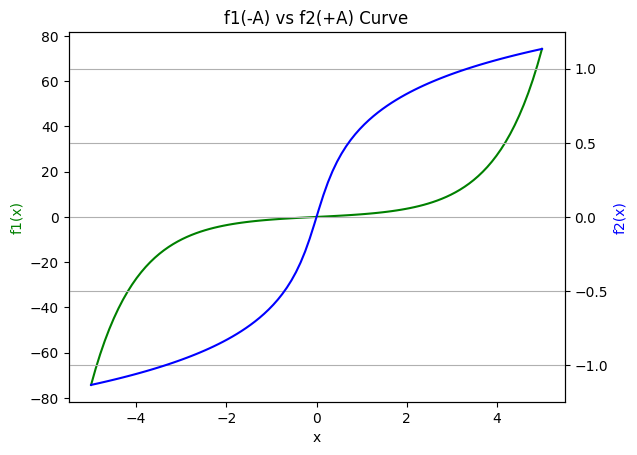

In [75]:
import numpy as np
import matplotlib.pyplot as plt

r_exp = False
Ag = 2.0

rfact = 1/(Ag+1)

def f1(x):
    return np.sinh(x)

def f2(x):
    if(r_exp):
        return np.tanh(x)
    return rfact*np.arcsinh(x/rfact)

def f1_inv(x):
    return np.arcsinh(x)

def f2_inv(x):
    if(r_exp):
        return np.arctanh(x)
    return rfact*np.sinh(x/rfact)


x = np.linspace(-5, 5, 100)
y = f1(x)
yt = f2(x)

fig, ax1 = plt.subplots()
ax1.plot(x, y, 'g-')
ax2 = ax1.twinx()
ax2.plot(x, yt, 'b-')

ax1.set_xlabel('x')
ax1.set_ylabel('f1(x)', color = 'g')
ax2.set_ylabel('f2(x)', color = 'b')

plt.title('f1(-A) vs f2(+A) Curve')
plt.grid(True)
plt.show()

In [76]:
import math

print(f'Liquidity Cost L : {L}')
print(f'Urgency Factor A : {Ag}')
opt_seconds = float(optimal_t * minutes_per_day * 60)
print(f'Original Optimal Seconds: {opt_seconds}')

X0 = float(trade_qty)
print(f'X0: {X0}')
Ct = [0.0]
Xt_neg = [X0]
Xt_pos = [X0]
if(r_exp):
    k = float(1.0 + abs(Ag)) ** (1.0/np.log(2.0))
else:
    k = float(1.0 + abs(Ag))
k /= opt_seconds
print(f'k factor: { k }')


for s in range(0, math.ceil(opt_seconds)+1):

    Zt_neg = f1(k * max(opt_seconds - s, 0.0) ) / f1(k * opt_seconds)
    Xt_neg.append(X0*Zt_neg)

    Zt_pos = f2(k * max(opt_seconds - s, 0.0) ) / f2(k * opt_seconds)
    Xt_pos.append(X0*Zt_pos)
    Ct.append(s)

print(Ct)
print(Xt_neg)
print(Xt_pos)


Liquidity Cost L : 23.0
Urgency Factor A : 2.0
Original Optimal Seconds: 41.78418852120782
X0: 100.0
k factor: 0.07179749341015279
[0.0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
[100.0, 100.0, 93.03622260338933, 86.55224183025793, 80.51461917682093, 74.89221805044905, 69.65604319530766, 64.77909116107232, 60.23621104357453, 56.003974779203645, 52.06055632416091, 48.38561909548168, 44.96021109334822, 41.76666716382936, 38.788517898006326, 36.01040469766892, 33.418000569567994, 30.997936239752494, 28.737731206955747, 26.625729379466783, 24.65103896355994, 22.80347629348164, 21.073513313320273, 19.452228439918233, 17.931260553421456, 16.502765878191365, 15.15937753171002, 13.894167532868249, 12.700611073710089, 11.5725528703793, 10.50417541973677, 9.489968997945104, 8.524703246300234, 7.603400197775563, 6.721308605173877, 5.873879438494964, 5.056742425156456, 4.26568351

f1 Halflife seconds: 9.552010103894375 22.86%
f2 Halflife seconds: 32.46672674656853 77.70%


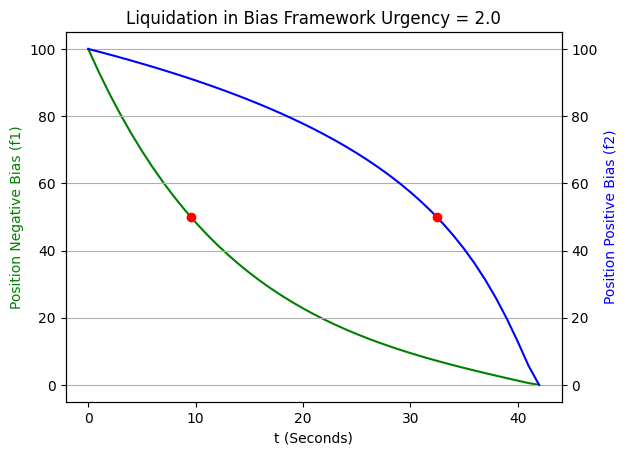

In [77]:
fig, ax1 = plt.subplots()
ax1.plot(Ct, Xt_neg, 'g-')
ax2 = ax1.twinx()
ax2.plot(Ct, Xt_pos, 'b-')

#0.5 = sinh(k * (T-t)) / sinh(k * T)
#0.5 * sinh(k * T) = sinh(k * (T-t))
#arcsinh( 0.5 * sinh(k * t) ) = k * (T-t)
#arcsinh( 0.5 * sinh(k * t) ) / k  = (T-t)
h1 = -(f1_inv( 0.5 * f1(k * opt_seconds) ) / k - opt_seconds)
print(f'f1 Halflife seconds: {h1} {100*h1/opt_seconds:.2f}%')
ax1.plot(h1, X0/2.0, 'ro')

h2 = -(f2_inv( 0.5 * f2(k * opt_seconds) ) / k - opt_seconds)
print(f'f2 Halflife seconds: {h2} {100*h2/opt_seconds:.2f}%')
ax2.plot(h2, X0/2.0, 'ro')

ax1.set_xlabel('t (Seconds)')
ax1.set_ylabel('Position Negative Bias (f1)', color = 'g')
ax2.set_ylabel('Position Positive Bias (f2)', color = 'b')

plt.title(f'Liquidation in Bias Framework Urgency = {Ag}')
plt.grid(True)
plt.show()

<...Sections 7. and 8. Omitted for brevity...>

9\. **On Microstructure**


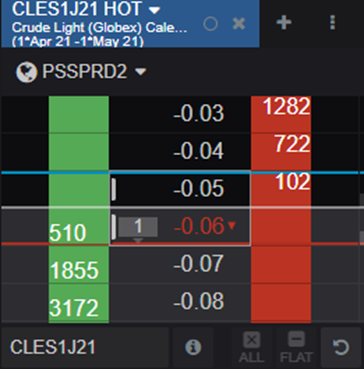

<span class="mark">**Figure 8.** Liquidity Imbalance.</span>

1)  Passive Liquidity

<span style="color:yellow">Providing passive liquidity when possible reduces the overall liquidity
premium spent during execution.</span> In the figure above, we see a large
bid-side order imbalance that our algorithm would be wise to try to
rectify. To this end, we optionally allow passive child orders to
*extend* the Equilibrium Horizon, in as much as they correct an order
imbalance or have a high probability of reducing overall liquidity cost.
In our implementation, each passive child order contains logic to remain
passive until microstructure no longer indicates a high probability of
cost reduction.

### **How does this work in practice?**


Some Existing literature:

1. Order Book Dynamics in Liquid Markets: Limit Theorems and Diffusion Approximations
   - Rama Cont and Adrien de Larrard 2012
   - https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1757861
   - 'We propose a model for the dynamics of a limit order book in a liquid market where buy and sell orders are submitted at high frequency.'
   - Section 5.3 proposes the probability of a price increase
   
2. Price Dynamics in a Markovian Limit Order Market
   - Rama Cont and Adrien de Larrard 2012
   - https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1735338
   - 'We propose and study a simple stochastic model for the dynamics of a limit order book, in which arrivals of market order, limit orders and order cancellations are described in terms of a Markovian queueing system.'
   
   

In [30]:
c_functions.cont_larrard_diffusion_prob_up.restype = c_double
c_functions.cont_larrard_diffusion_prob_up.argtypes = [c_double, c_double, c_double, c_double, c_double,
                                                       c_double, c_double,]


bid_size = c_double(start_row.bid_size_0.values[0])
ask_size = c_double(start_row.ask_size_0.values[0])

bid_sells_per_second = c_double(0.1)
ask_buys_per_second = c_double(0.2)
mean_buy_size = c_double(5)
mean_sell_size = c_double(3)
correlation_buy_vs_sell = c_double(0.5)

print("Bid Size: ", bid_size)
print("Ask Size: " , ask_size)

proba_up = c_functions.cont_larrard_diffusion_prob_up(bid_size, ask_size, correlation_buy_vs_sell,
                                                      bid_sells_per_second, ask_buys_per_second,
                                                      mean_sell_size, mean_buy_size)

print("Sells per second", bid_sells_per_second)
print("Buys per second", ask_buys_per_second)
print("Avg Sell Size", mean_sell_size)
print("Avg Buy Size", mean_buy_size)
print("Cont-Larrard proba UP: ", 100*proba_up, "%")
print("Cont-Larrard proba In Our Favor: ", 100*(1-proba_up), "%")

Bid Size:  c_double(18.0)
Ask Size:  c_double(58.0)
Sells per second c_double(0.1)
Buys per second c_double(0.2)
Avg Sell Size c_double(3.0)
Avg Buy Size c_double(5.0)
Cont-Larrard proba UP:  37.47113591958492 %
Cont-Larrard proba In Our Favor:  62.52886408041508 %


<span style="color:yellow"> **So in this case, we would be well served to send a passive order, instead of an aggressive order, at least until the probabilities changed.**</span>

**Let's try a simulation** 

In [31]:
import libspark_python
import OrderService_pb2

In [32]:
matcher = libspark_python.OrderMatcherC(security_desc)

In [33]:
def load_row(me, dfrow, timestamp_column):
    ts = dfrow[timestamp_column].values[0].astype(np.int64).astype(np.uint64)
    for i in range(0, nlevels):
        me.set_exchange_book(i, int(dfrow[f'bid_size_{i}'].values[0]),
                             dfrow[f'bid_price_{i}'].values[0], True, ts)
        me.set_exchange_book(i, int(dfrow[f'ask_size_{i}'].values[0]),
                             dfrow[f'ask_price_{i}'].values[0], False, ts)


In [34]:
load_row(matcher, start_row, our_timestamp)

In [35]:
b = matcher.get_exchange_book()
print(b)

oid = matcher.add_order(1, start_row.ask_price_0.values[0], True)
print(oid)
m = matcher.get_matches()
for mm in m:
    print(mm)

mb = matcher.get_modified_exchange_book()
print(mb)


Book for security id 0 at ts 1727185299753621215
18 5777.750000 @ 5778.000000 58
42 5777.500000 @ 5778.250000 62
66 5777.250000 @ 5778.500000 68
60 5777.000000 @ 5778.750000 78
65 5776.750000 @ 5779.000000 61

1729004620976673303
{}
{"orderKey":3360870935,"securityKey":3360872005,"execId":"1729004620976674324","lastPrice":5778,"side":"SIDE_BUY","lastShares":1,"fillKey":"ESZ4-1729004620976674324","timestamp":"2024-10-15T15:03:41.128173456Z","aggressorIndicator":"AGGRESSOR_INDICATOR_MATCH_AGGRESSOR","secondaryExecId":"1729004620976673303","tradeDate":"2024-10-15T15:03:41.128173456Z"}

Book for security id 0 at ts 0
18 5777.750000 @ 5778.000000 57
42 5777.500000 @ 5778.250000 62
66 5777.250000 @ 5778.500000 68
60 5777.000000 @ 5778.750000 78
65 5776.750000 @ 5779.000000 61



In [36]:

def send_limit_order(me, slice_qty, bid : float, ask : float, is_buy, ts, passive : bool):
    price = ask
    if(is_buy):
        if(passive):
            price = bid
        else:
            price = ask
    else:
        if(passive):
            price = ask
        else:
            price = bid

    me.add_order(slice_qty, price, is_buy, ts)

In [37]:
def decide_passive_aggressive(allow_passive_order : bool,
                              is_buy : bool,
                              curr_bid_size, curr_ask_size):
    if not allow_passive_order:
        return False

    proba_up = c_functions.cont_larrard_diffusion_prob_up(curr_bid_size, curr_ask_size, correlation_buy_vs_sell,
                                                          bid_sells_per_second, ask_buys_per_second,
                                                          mean_sell_size, mean_buy_size)
    proba_success = proba_up
    if(is_buy):
        proba_success = 1.0-proba_success

    if(proba_success > 0.5):
        return True
    return False

In [38]:
def simulate(allow_passive_order : bool):
    seconds_spent = 0.0
    print("Trade Quantity ", trade_qty)
    i = 0
    prev_ts = start_row[our_timestamp].values[0].astype(np.int64).astype(np.uint64)
    destination_price = arrival_price
    total_sent = 0
    total_filled = 0
    avg_price = 0.0
    num_passive_lots = 0
    num_aggressive_lots = 0

    sim_optimal_t = c_functions.darby_2021_optimal_t(arrival_price, arrival_price, cost_per_lot, is_buy, sigma, 0.0, 0.0)
    sim_optimal_t *= minutes_per_day * 60
    print("Initial Optimal T seconds", sim_optimal_t)

    while seconds_spent <= sim_optimal_t + 5:
        curr_row = df.iloc[start_row_index + i : start_row_index + i + 1]
        load_row(matcher, curr_row, our_timestamp)

        curr_ts = curr_row[our_timestamp].values[0].astype(np.int64).astype(np.uint64)
        seconds_spent += (curr_ts - prev_ts) / 1_000_000_000.0
        prev_ts = curr_ts
        i += 1
        print(i, matcher.get_exchange_book())

        x1 = ( 1.0 - min(seconds_spent / sim_optimal_t, 1) ) * trade_qty
        xt = trade_qty - total_sent

        #NOTE we could chunk this up if we wanted to
        slice_qty = int(max(xt - x1, 0.0))
        if(slice_qty > 0.0):
            print("Sending slice order ", slice_qty, is_buy.value, curr_ts)
            dt = type(curr_ts)
            order_ts = np.uint64(curr_ts) + np.uint64(100) #NOTE don't do np.uint64(curr_ts + 100), it subtracts..89
            passive = decide_passive_aggressive(allow_passive_order, is_buy.value,
                                                curr_row.bid_size_0.values[0],
                                                curr_row.ask_size_0.values[0])
            send_limit_order(matcher,
                            slice_qty,
                            curr_row.bid_price_0.values[0],
                            curr_row.ask_price_0.values[0],
                            is_buy.value,
                            order_ts,
                            passive )
            total_sent += slice_qty
            if(total_sent > trade_qty):
                assert False

        matches = matcher.get_matches()
        for m in matches:
            for f in m.get_fills():
                if(f.last_shares == 0):
                    continue
                print("fill ", f)
                delta = avg_price * total_filled + f.last_price * f.last_shares
                avg_price = delta / (total_filled + f.last_shares)
                total_filled += f.last_shares
                if(f.aggressor_indicator == 2):
                    num_passive_lots += f.last_shares
                elif(f.aggressor_indicator == 1):
                    num_aggressive_lots += f.last_shares


        curr_book_sizes = BookSizes(int(curr_row.ask_size_0.values[0]), int(curr_row.ask_size_1.values[0]),
                                    int(curr_row.ask_size_2.values[0]), int(curr_row.ask_size_3.values[0]),
                                    int(curr_row.ask_size_4.values[0]))

        curr_book_prices = BookPrices(float(curr_row.ask_price_0.values[0]), float(curr_row.ask_price_1.values[0]),
                                    float(curr_row.ask_price_2.values[0]), float(curr_row.ask_price_3.values[0]),
                                    float(curr_row.ask_price_4.values[0]))

        destination_price = 0.5*(curr_row.bid_price_0.values[0] + curr_row.ask_price_0.values[0])


        curr_L = c_functions.liquidity_cost(c_double(trade_qty), c_double(destination_price),
                                            curr_book_prices, c_int(nlevels),
                                            curr_book_sizes, c_int(nlevels),
                                            is_buy, reverse, residual_ptr)
        curr_cost = curr_L / trade_qty
        sim_optimal_t = c_functions.darby_2021_optimal_t(arrival_price, arrival_price, curr_cost, is_buy, sigma, 0.0, 0.0)
        sim_optimal_t *= minutes_per_day * 60
        print("Current Optimal T seconds", sim_optimal_t)


    print(f"Total time elapsed {seconds_spent } seconds i = {i} total_sent { total_sent }")
    print(f"Total filled {total_filled} avg_price { avg_price } num_passive_lots { num_passive_lots } num_aggressive_lots { num_aggressive_lots } ")
    print(f"ArrivalPrice { arrival_price } DestinationPrice { destination_price } ")
    print(f"Slippage { (avg_price - arrival_price) : .2f} SlippageSweep { (avg_price - (arrival_price + L/trade_qty)) : .2f} ")

In [39]:
simulate(allow_passive_order=False)

Trade Quantity  100.0
Initial Optimal T seconds 41.78418852120782
1 Book for security id 0 at ts 1727185299753621215
18 5777.750000 @ 5778.000000 58
42 5777.500000 @ 5778.250000 62
66 5777.250000 @ 5778.500000 68
60 5777.000000 @ 5778.750000 78
65 5776.750000 @ 5779.000000 61

Current Optimal T seconds 41.78418852120782
2 Book for security id 0 at ts 1727185299753882133
20 5777.750000 @ 5778.000000 58
42 5777.500000 @ 5778.250000 62
66 5777.250000 @ 5778.500000 68
60 5777.000000 @ 5778.750000 78
65 5776.750000 @ 5779.000000 61

Current Optimal T seconds 41.78418852120782
3 Book for security id 0 at ts 1727185299753882307
21 5777.750000 @ 5778.000000 58
42 5777.500000 @ 5778.250000 62
66 5777.250000 @ 5778.500000 68
60 5777.000000 @ 5778.750000 78
65 5776.750000 @ 5779.000000 61

Current Optimal T seconds 41.78418852120782
4 Book for security id 0 at ts 1727185299753916843
21 5777.750000 @ 5778.000000 57
42 5777.500000 @ 5778.250000 62
66 5777.250000 @ 5778.500000 68
60 5777.000000 @ 57

In [40]:
simulate(allow_passive_order=True)

Trade Quantity  100.0
Initial Optimal T seconds 41.78418852120782
1 Book for security id 0 at ts 1727185299753621215
18 5777.750000 @ 5778.000000 58
42 5777.500000 @ 5778.250000 62
66 5777.250000 @ 5778.500000 68
60 5777.000000 @ 5778.750000 78
65 5776.750000 @ 5779.000000 61

Current Optimal T seconds 41.78418852120782
2 Book for security id 0 at ts 1727185299753882133
20 5777.750000 @ 5778.000000 58
42 5777.500000 @ 5778.250000 62
66 5777.250000 @ 5778.500000 68
60 5777.000000 @ 5778.750000 78
65 5776.750000 @ 5779.000000 61

Current Optimal T seconds 41.78418852120782
3 Book for security id 0 at ts 1727185299753882307
21 5777.750000 @ 5778.000000 58
42 5777.500000 @ 5778.250000 62
66 5777.250000 @ 5778.500000 68
60 5777.000000 @ 5778.750000 78
65 5776.750000 @ 5779.000000 61

Current Optimal T seconds 41.78418852120782
4 Book for security id 0 at ts 1727185299753916843
21 5777.750000 @ 5778.000000 57
42 5777.500000 @ 5778.250000 62
66 5777.250000 @ 5778.500000 68
60 5777.000000 @ 57

### **Simulation Results**
1) Arrival Price over 55 seconds with ONLY aggressive children saved 68 cents per lot from mid-market and 91 cents versus a market order.
   * <span style="color:yellow">This is $4,500 dollars in savings vs a market order for a 100 lot emini S&P order.</span>
   
2) Arrival Price with a probabilistic model of aggressive and passive saved 89 cents per lot from mid-market and $1.12 versus a market order.
   * <span style="color:yellow">This is $5,600 dollars in savings vs a market order for a 100 lot emini S&P order.</span>
   
Notes about the simulation:
 * Optimal Time increased as liquidity dried up, and then decreased during the execution time of the order
 * Volatility could change over the course of the order, but we ignored that during the simulation
 * We simplified the "Payup Model" to compute a simple probability and remain resting if the market moved against us, instead of chasing
 * We did not speed up as the market moved towards us, we examine that idea in the appendix below

Appendix

A.1 On Short-Term Price Indicators and Drift

Until now we’ve ignored short-term interest rates; for rates in the
realm of normal, and over reasonably short periods, this is probably a
safe assumption. However, it’s worthwhile to examine whether the model
can be extended to accommodate short-term pricing trends in the form of
‘drift’ in the place of rates.

As such, we restate the central SDE as:

``` math
dS_{t}\  = \ \mu S_{t}\ dt\  + \ \sigma dW_{t}
```

Where μ is the coefficient that represents a short-term forward drift
over the maximum tenor of the order. For the purposes of this
discussion, we’ll continue to ignore interest rates such that the
present value of a dollar given at T is equal to one.


<...Omitted for brevity ...>

#### How does drift affect the computations?

* <span style="color:yellow">Remember, we're inverting an options pricing model to find "implied time".  </span>

* Implied Time is the amount of time over which executing this order carries an equal risk as paying the price of liquidity

* We have thus far assumed that our "strike" (k, below in eq1, equal to ArrivalPrice)  is equal to the "forward" $S_{T}$ thus making $d_{1}$ equal to zero


``` math
C_{t}\  = \ e^{- r(T - t)}\ ((S_{T} - k) \cdot \Phi(d_{1})\  + \ g)
```

Where

``` math
d_{1}\  = \ (S_{T} - k)\ /\ (\ \sigma\sqrt{(T - t)\ }\ )
```

``` math
g\  = \ \varphi(d_{1})\  \cdot \ \sigma\sqrt{(T - t)}\   
``` 

* <span style="color:yellow">One could envision setting the forward here to some prediction of the future value of S, or the current value of S during an execution period.  </span>

* Peter Jaeckel wrote a nice paper on how to invert Normal Vol to find volatility from price [7], we created a similar algorithm to find "implied time" if $d_{1}$ != 0.0 <http://www.jaeckel.org/ImpliedNormalVolatility.pdf>

* Let's examine what happens when $d_{1}$ != 0.0

In [41]:
print("Original T* - Optimal Time in Minutes", optimal_t * minutes_per_day)

Original T* - Optimal Time in Minutes 0.6964031420201303


In [42]:
drift = -0.125

#NOTE for technical reasons we negate the drift here
optimal_t_drift = c_functions.darby_2021_optimal_t(arrival_price - drift, arrival_price, cost_per_lot, is_buy, sigma, 0.0, 0.0)
optimal_t2_drift = c_functions.darby_2021_optimal_t(arrival_price - drift, arrival_price, cost_per_lot, is_buy, 2.0*sigma.value, 0.0, 0.0)

print("Drift In Our Favor", drift)
print("Cost per lot", cost_per_lot.value)
print("T* - With Drift", optimal_t_drift * minutes_per_day)
print("T* - With Drift 2x Vol", optimal_t2_drift * minutes_per_day)

Drift In Our Favor -0.125
Cost per lot 0.23
T* - With Drift 0.33608832648392983
T* - With Drift 2x Vol 0.08402208162098246


In [43]:
drift = 0.125

optimal_t_drift = c_functions.darby_2021_optimal_t(arrival_price - drift, arrival_price, cost_per_lot, is_buy, sigma, 0.0, 0.0)
optimal_t2_drift = c_functions.darby_2021_optimal_t(arrival_price - drift, arrival_price, cost_per_lot, is_buy, c_double(2.0*sigma.value), 0.0, 0.0)

print("Drift Against us", drift)
print("Cost per lot", cost_per_lot.value)
print("T* - With Drift", optimal_t_drift * minutes_per_day)
print("T* - With Drift 2x Vol", optimal_t2_drift * minutes_per_day)

Drift Against us 0.125
Cost per lot 0.23
T* - With Drift 1.093407151579981
T* - With Drift 2x Vol 0.27335178789499526


 * So defining drift in this way speeds up if the market moves in our favor, and slows down if it moves against.  
 * <span style="color:yellow">This could be a nice artifact, depending on the implementation</span>
 * One could envision a capped effect or even a convex function that speeds up in both directions, etc...
 * We don't know what the price will be at the end of the optimal time horizon, we just try to act opportunistically over the course of that time.

In [ ]:
assert False


### **Hey it's 2024, and you haven't said anything about Machine Learning yet.**

  - I wanted to wait till the end
   
*From Above*
> 
> 1) Arrival Price over 55 seconds with ONLY aggressive children saved 68 cents per lot from mid-market and 91 cents versus a market order.  <span style="color:cyan">This is $4,500 dollars in savings vs a market order for a 100 lot emini S&P order.</span>
> 2) Arrival Price with a probabilistic model of aggressive and passive saved 89 cents per lot from mid-market and $1.12 versus a market order.  <span style="color:cyan">This is $5,600 dollars in savings vs a market order for a 100 lot emini S&P order.</span>


  - <span style="color:yellow">In futures markets, passive fills matter</span>
  - <span style="color:yellow">It turns out that ML methods are pretty good at figuring out Proba UP, Down, or Unch</span>
  - *Sneak peek below*
  

In [51]:
import libspark_ml_python;

In [52]:
our_target = 'future_tick_cat'
should_classify = True
compression = 500.0

In [53]:
df['future_mid'] = df[price_target].shift(-1)
price_target

'mid_0'

In [54]:
def condition_classifier(s):
    if (s['future_mid'] < s['mid_0']):
        return 0
    elif (s['future_mid'] > s['mid_0']):
        return 2
    else:
        return 1

df['future_tick_cat'] = df.apply(condition_classifier, axis=1)
df.tail()

index  version            timestamp  sending_time  \
588034  646575        3  1727186399943419000             0   
588035  646576        3  1727186399968696000             0   
588036  646577        3  1727186399968808000             0   
588037  646578        3  1727186399974933000             0   
588038  646579        3  1727186399976765000             0   

                       transact_time  security_id security  trade_count  \
588034 2024-09-24 13:59:59.943093173       183748     ESZ4          NaN   
588035 2024-09-24 13:59:59.968368963       183748     ESZ4          NaN   
588036 2024-09-24 13:59:59.968484927       183748     ESZ4          NaN   
588037 2024-09-24 13:59:59.974620937       183748     ESZ4          NaN   
588038 2024-09-24 13:59:59.974620937       183748     ESZ4          NaN   

        avg_trade_price  min_trade_price  max_trade_price  sum_trade_size  \
588034              NaN              NaN              NaN             NaN   
588035              NaN              NaN              NaN             NaN   
588036              NaN              NaN              NaN             NaN   
588037              NaN              NaN              NaN             NaN   
588038              NaN              NaN              NaN             NaN   

        sum_trade_number_of_orders  last_trade_price  last_trade_size  \
588034                         NaN               0.0              0.0   
588035                         NaN               0.0              0.0   
588036                         NaN               0.0              0.0   
588037                         NaN               0.0              0.0   
588038                         NaN               0.0              0.0   

        last_trade_number_of_orders  last_trade_agg_side  bid_price_0  \
588034                          0.0                  0.0      5772.25   
588035                          0.0                  0.0      5772.25   
588036                          0.0                  0.0      5772.25   
588037                          0.0                  0.0      5772.25   
588038                          0.0                  0.0      5772.25   

        bid_size_0  bid_price_1  bid_size_1  bid_price_2  bid_size_2  \
588034         9.0       5772.0        32.0      5771.75        36.0   
588035         9.0       5772.0        32.0      5771.75        36.0   
588036         9.0       5772.0        32.0      5771.75        36.0   
588037         5.0       5772.0        32.0      5771.75        36.0   
588038         5.0       5772.0        32.0      5771.75        36.0   

        bid_price_3  bid_size_3  bid_price_4  bid_size_4  bid_price_5  \
588034       5771.5        11.0      5771.25       215.0       5771.0   
588035       5771.5        11.0      5771.25       215.0       5771.0   
588036       5771.5        11.0      5771.25       215.0       5771.0   
588037       5771.5        11.0      5771.25       215.0       5771.0   
588038       5771.5        11.0      5771.25       215.0       5771.0   

        bid_size_5  bid_price_6  bid_size_6  bid_price_7  bid_size_7  \
588034        48.0      5770.75        47.0       5770.5        38.0   
588035        48.0      5770.75        47.0       5770.5        38.0   
588036        48.0      5770.75        47.0       5770.5        38.0   
588037        48.0      5770.75        47.0       5770.5        38.0   
588038        48.0      5770.75        47.0       5770.5        38.0   

        bid_price_8  bid_size_8  bid_price_9  bid_size_9  ask_price_0  \
588034      5770.25        37.0       5770.0       207.0      5772.75   
588035      5770.25        37.0       5770.0       207.0      5772.75   
588036      5770.25        37.0       5770.0       207.0      5772.75   
588037      5770.25        37.0       5770.0       207.0      5772.75   
588038      5770.25        37.0       5770.0       207.0      5772.75   

        ask_size_0  ask_price_1  ask_size_1  ask_price_2  ask_size_2  \
588034         5.0       577

In [55]:
df[our_target].value_counts().to_frame().style.bar()

In [56]:
prediction_factor = 0.80
prediction_window = (int(len(df)*prediction_factor), len(df))
prediction_window

(470431, 588039)

In [57]:
sys.path.append('../../../../build/debug/server/')
sys.path.append('../../../../build/debug/src/lib/libspark_ml_python/protos/')
sys.path.append('../../../../build/debug/src/lib/libspark_ml/protos/')
sys.path.append('../../../../build/debug/src/lib/api/')
sys.path.append('../../../../build/debug/src/')
sys.path.append('../../../../ml/')

In [58]:
from features.features_mbo.featurize_mbo import featurize_mbo
from pipeline.utils.accuracy import print_accuracy_window
from pipeline.methods.lightgbm.fit import prepare_data

In [59]:
featurized_data, feature_cols, _ = featurize_mbo(df,
                                                 our_timestamp=our_timestamp,
                                                 price_target=price_target,
                                                 compression=compression,
                                                 use_cpp_features=True,
)

num packets 588039
num updates 588039


In [60]:
x = featurized_data[feature_cols].values.astype(np.float32)
y = featurized_data[our_target].values.astype(np.float32)
t = featurized_data[our_timestamp].values
t_test=t[prediction_window[0]:prediction_window[1]]
print(x.shape)
print(y.shape)
print(len(t), len(t_test))

(588039, 49)
(588039,)
588039 117608


In [61]:
x_train, y_train, w_train, x_test, y_test = prepare_data(
        x_train=x[np.r_[:prediction_window[0], prediction_window[1]:len(featurized_data)]],
        y_train=y[np.r_[:prediction_window[0], prediction_window[1]:len(featurized_data)]],
        x_test=x[prediction_window[0]:prediction_window[1]],
        y_test=y[prediction_window[0]:prediction_window[1]],
        )

print(len(x_train), len(x_test))
print(len(y_train), len(y_test))
print(len(t), len(t_test))

470431 117608
470431 117608
588039 117608


In [62]:
from boosting_params import get_boosting_params

boosting_params = get_boosting_params(should_classify)

In [63]:
base_model = libspark_ml_python.BoosterModel(boosting_params)
#base_model.set_feature_names(feature_cols)

In [64]:
model = base_model.fit(x_train, y_train)

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] num_iterations is set=1000, n_estimators=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] device_type is set=cpu, device=cpu will be ignored. Current value: device_type=cpu
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] num_iterations is set=1000, n_estimators=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] device_type is set=cpu, device=cpu will be ignored. Current value: device_type=cpu
[LightGBM] [Info] Total Bins 6033
[LightGBM] [Info] Number of data points in the train set: 470431, number of used features: 32
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] 

In [65]:
y_pred_val_probs = model.predict(x_test)

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] num_iterations is set=1000, n_estimators=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] device_type is set=cpu, device=cpu will be ignored. Current value: device_type=cpu


<span style="color:yellow">Here we introduce a parameter, ``prob_thresh``, if zero, it means 'take the largest likelyhood' if nonzero, it means only predict up or down if the probability of that move is greater than or equal to the thresh</span>

In [66]:
prob_thresh = 0.0

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.plot(y_pred_val)
print(y_pred_val_probs.shape)
if should_classify:
    if prob_thresh > 0.0:
        assert prob_thresh >= 0.5
        y_pred_val = np.asarray([(lambda line: np.argmax(line) if np.amax(line) >= prob_thresh else 1)(line) for line in y_pred_val_probs])
    else:
        y_pred_val = np.asarray([np.argmax(line) for line in y_pred_val_probs])
else:
    y_pred_val = y_pred_val_probs

(117608, 3)


In [68]:
quantile_var = None
if should_classify:
    up_round_thresh = 0.5
    dn_round_thresh = 0.5
    center = 1.0
else:
    up_round_thresh = 0.02
    dn_round_thresh = 0.02
    center = 0.0

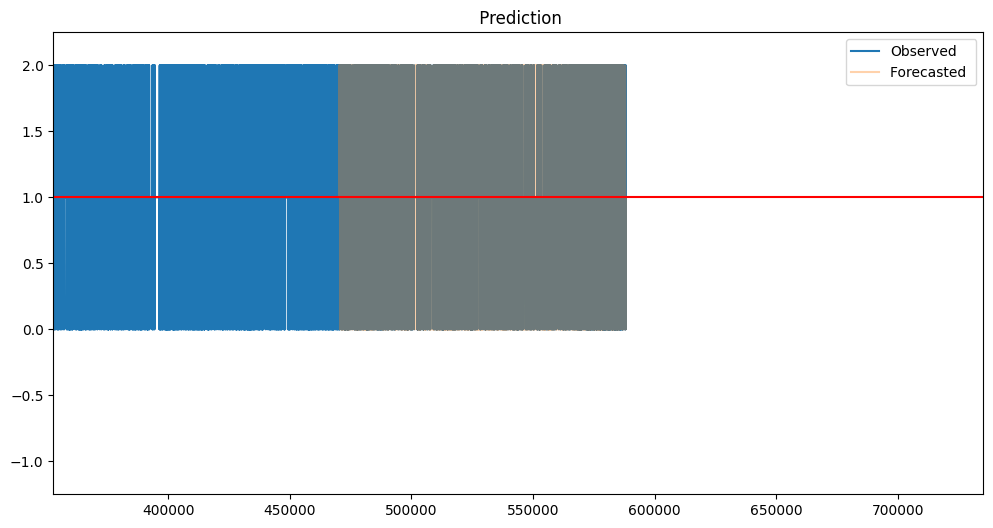

In [69]:
from datetime import timedelta

fig, ax1 = plt.subplots(figsize = (12,6))
obs = plt.plot(featurized_data[our_target].values, label = 'Observed')
forecast = plt.plot(range(prediction_window[0], prediction_window[1]),
                    y_pred_val , label = 'Forecasted ', alpha = 0.35, color = 'tab:orange')
plt.axhline(y = center, color = 'r')
plt.legend(loc = 'upper left')

if(quantile_var is not None):
    ax2 = ax1.twinx()
    ax2.plot(range(prediction_window[0], prediction_window[1]),
                   quantile_var , label = 'Var%', alpha = 0.15, color = 'green')
    ax2.axhline(y = quantile_std_mean, color = 'tab:orange', label="StdErr Mean: {}".format( np.round(quantile_std_mean, 4)))

plt.legend(loc = 'upper right')
plt.title(" Prediction");
#plt.xlim([34500,37000])
plt.xlim([0.75*prediction_window[0], prediction_window[1]*1.25])
if not should_classify:
    if(isinstance(future_shift, timedelta)):
        ax1.set_ylim([center - 3.75,center + 3.75])
    else:
        ax1.set_ylim([center - 0.75,center + 0.75])
else:
    ax1.set_ylim([-1.25,2.25])

In [70]:
pred_price = featurized_data['future_mid'][prediction_window[0]:prediction_window[1]]

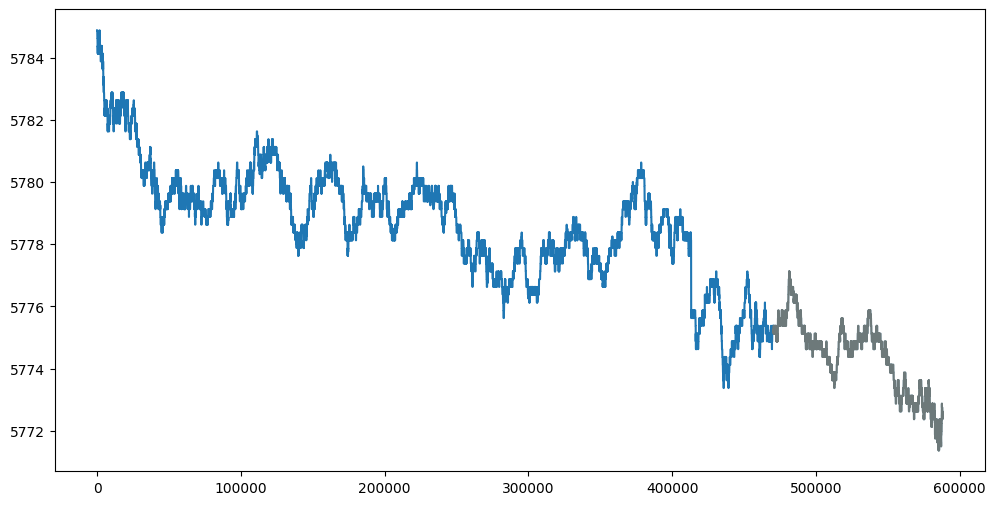

In [71]:
fig, axp = plt.subplots(figsize = (12,6))
obs = axp.plot(featurized_data['future_mid'].values, label = 'Price')
forecast = plt.plot(range(prediction_window[0], prediction_window[1]),
                    pred_price , label = 'Forecasted ', alpha = 0.35, color = 'tab:orange')

In [72]:
fit_res = print_accuracy_window(y_pred_val, y_test,
                                up_round_thresh = up_round_thresh,
                                dn_round_thresh = dn_round_thresh,
                                center = center,
                                actual_window = 200,
                                pred_window = 200,
                                time_vals = t_test,
                                )

WIN means: Predicted up, it went up in window. LOSE means: Predicted up, it went down in window.
SCRATCH means: Predicted up, it didn't move in window. CAPTURE means: % of all ups that were predicted in lookback window

up DIRECT hits 1015  73%
up CLEAR misses 130  9%
actual ups 1383
   UP Capture in window% 84%    1168
dn DIRECT hits 1032  74%
dn CLEAR misses 141  10%
actual dns 1399
   DN Capture% in window 85%    1188


UP wins / scratches / losses -- Total : 8278  /  1129  /  1580  --  10987
   UP WIN% 75%
   UP LOSS% 14%
   UP Scratch% 10%
DN wins / scratches / losses -- Total : 8165  /  1261  /  1444  --  10870
   DN WIN% 75%
   DN LOSS% 13%
   DN Scratch% 12%
UNCH wins / losses -- Total : 95099  /  452  --  95551  --- total rows ---  117608
   UNCH LOSS% 0%


Avg Pred Capture w in frames 53.540732780677516  act window :  200  pred window:  200
Avg First Pred to Correct 100.87678647448763
Avg window in time 1025.0497907949791
Up Clear Misses 3,973,978,3353,3758,3760,6439,6602,667

In [73]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [74]:
if should_classify:
    report = classification_report(y_test, y_pred_val, labels=[0,1,2])
    print(report)

    conf = confusion_matrix(y_test, y_pred_val, labels=[0,1,2], normalize=None)#'true')
    print(conf)

accuracy = accuracy_score(y_test, y_pred_val)

print(f'Overall Accuracy (inc unch): {accuracy}')

              precision    recall  f1-score   support

           0       0.09      0.74      0.17      1399
           1       1.00      0.83      0.90    114826
           2       0.09      0.73      0.16      1383

    accuracy                           0.83    117608
   macro avg       0.39      0.77      0.41    117608
weighted avg       0.97      0.83      0.89    117608

[[ 1032   237   130]
 [ 9701 95281  9844]
 [  141   227  1015]]
Overall Accuracy (inc unch): 0.8275627508332767


### Thanks for listening

#### CQG Algos: Trade optimally

<https://www.cqg.com/solutions/cqg-execution-technologies/cqg-algos>


#### Time Is Money: The Equilibrium Trading Horizon and Optimal Arrival Price
<https://www.sciencepg.com/article/10.11648/j.ajam.20221003.12>

Linkedin: <https://www.linkedin.com/in/kevin-darby-148000a/>


#### Footnotes

[^1]: An accumulation can also be considered in much the same manner.

[^2]: In practice, Arrival Price is defined as the midpoint between best
    bid and ask or some weighted formulation therein.
    <span class="mark">\[14\]</span>

[^3]: As we are primarily concerned with small trading horizons of a day
    or perhaps a week, ABM (Arithmetic Brownian Motion) is functionally
    equivalent to GBM, it’s geometric and more famous counterpart
    <span class="mark">\[1\] \[5\]</span>.

[^4]: Net of interest rates

[^5]: Technically a liquidation or sell order would require a put, but
    since their prices are equal with (S<sub>T</sub> = k) we defer to
    the longstanding practice of doing the math using the call.

[^6]: Given that an order is only ever a buy or a sell and not both, and
    that 50% of moves would be in our favor, we consider a
    half-straddle. Other structures (straddle, risk-reversal) could be
    considered based on risk tolerance and trading goals (Thanks to
    Scott Layne for this insight). See also Appendix 2.

[^7]: Also <span class="mark">\[4\], \[15\], \[11\]</span>

[^8]: Through an arbitrage free term-structure interpolation

[^9]: Without consideration of microstructure, see section 9.

[^10]: An argument can be made for Z<sub>t</sub> = f(X<sub>t</sub>)
    here, but the results are similar and the original form is simpler.

[^11]: Because liquidity would seem cheaper.

[^12]: Pushing execution half-life toward the end of the horizon is
    sometimes called Destination Price

[^13]: Real or imagined

[^14]: Doing this in terms of ATM options allows for interesting scaling
    properties with sigma and t. It could also be defined in terms of
    raw P<sub>g</sub>, or some other factor according to user
    preference.<sub>.</sub>

[^15]: This ¼ number makes intuitive sense, but any method of
    determining half-life would suffice.

[^16]: Derivation of a functional form for A<sub>spd</sub> \> 0.0 is
    left to the reader (hint: try tanh).


<span class="mark">References</span>

1.  Almgren, Robert, and Neil Chriss. 2000. “Optimal execution of
    portfolio transactions.” *Risk* 3:5-39.

2.  Almgren, Robert, and Julian Lorenz. 2007. “Adaptive Arrival Price.”
    *Institutional Investor Journals* Algorithmic Trading III.

3.  Bachelier, Louis. 1900. “The Theory Of Speculation (translated).”
    *Annales scientifiques de l’Ecole Normale Superieur* 3 (17): 21-86.

4.  Garman, Mark, and Michael Klass. 1980 “On the Estimation of Security
    Price Volatilities from Historical Data” *The Journal of Business*
    53 no. 1: 67-78

5.  Gatheral, Jim, and Alexander Schied. 2011. “Optimal Trade Execution
    under Geometric Brownian Motion in the Almgren and Chriss
    Framework.” *International Journal of Theoretical and Applied
    Finance* 14 (3): 353-368.

6.  Grunspan, Cyril. 2011. “A Note on the Equivalence between the Normal
    and the Lognormal Implied Volatility: A Model Free Approach.”
    *ESILV, Department of Financial Engineering*, (December).

7.  Jäckel, Peter. 2017. “Implied Normal Volatility.” *Wilmott*, no.
    July 2017. <http://www.jaeckel.org/ImpliedNormalVolatility.pdf>

8.  LeFloc'h, Fabien. 2016. “Fast and Accurate Analytic Basis Point
    Volatility.” *SSRN*, (June).

9.  Parkinson, Michael. 1980 “The Extreme Value Method for Estimating
    the Variance of the Rate of Return” *The* *Journal of Business* 53,
    no. 1: 61-65

10. Perold, Andre. 1988. “The implementation shortfall: Paper versus
    reality.” *Journal of Portfolio Management* 14, no. 3 (Spring): 4-9.

11. Rogers, L.C.G. and S. E. Satchell. 1991. “Estimating Variance From
    High Low and Closing Prices” *The Annals of Appllied Probability* 1,
    no. 4: 504-512

12. Schaefer, Matthew P. 2002. “Pricing and Hedging European Options On
    Futures Spreads Using the Bachelier Spread Option Model.”
    *Conference on Applied Commodity Price Analysis, Forecasting, and
    Market Risk Management*, (April).

13. Shimko, David. 1994. “Options on Futures Spreads: Hedging,
    Speculation and Valuation.” *Journal of Futures Markets* 14 (2):
    183-213.

14. Wood, Greg. 2011. “Transaction Cost Analysis for Futures.”
    <https://www.cmegroup.com/education/files/TCA-4.pdf>.

15. Yang, Dennis, and Qiang Zhang. 2000. “Drift-Independent Volatility
    Estimation Based on High, Low, Open, and Close Prices" *The Journal
    of Business* 73, no. 3: 477 - 491